In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.constants import golden 

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (5.0, 5.0/golden)) 

cani = pd.read_csv('cani.csv', sep = ';', decimal=",", parse_dates=True)
cani

,Cartella,IP,GravitaIP,EtaAnni,MORTE,MC,SURVIVALTIME,Terapia,Antiaritmico,PesoKg,VTricuspide,AsxAo,OndaE,OndaEA,FrazEspuls,FrazAccorc,EDVI,ESVI,Allodiast,Allosist
0,S0601,NO,0,10.35,0,NaN,0,2,NO,5.25,0.00,2.50,1.15,0.97,70.0,37.0,78.69,23.75,1.58,0.99
1,C0621,NO,0,15.21,1,1.0,341,3,NO,6.00,0.00,1.61,1.50,1.47,83.0,51.0,130.58,23.88,1.94,0.99
2,B0918,NO,0,15.77,1,1.0,117,3,NO,3.20,0.00,2.50,1.87,2.08,91.0,62.0,180.35,16.22,2.21,0.84
3,R1009,NO,0,13.54,1,1.0,93,4,SI,26.50,0.00,3.07,2.28,2.85,75.0,44.0,234.17,40.15,2.09,1.16
4,R1513,NO,0,10.72,0,NaN,666,3,NO,11.00,0.00,2.54,0.75,0.86,69.0,38.0,139.84,43.89,1.98,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,G1006,SI,3,11.35,1,1.0,46,4,NO,8.80,4.51,2.77,1.74,NaN,78.0,46.0,260.51,41.33,2.23,1.21
157,A1403,SI,3,13.39,1,1.0,275,4,NO,8.00,4.54,2.49,NaN,NaN,74.0,41.0,104.55,29.51,1.76,1.03
158,Z1003,SI,3,12.40,1,1.0,43,3,NO,14.00,4.60,2.52,NaN,NaN,77.0,46.0,371.13,57.22,2.54,1.36
159,B1135,SI,3,14.19,1,1.0,269,4,NO,2.50,5.09,3.10,1.51,2.56,79.0,47.0,180.58,38.38,2.21,1.16


In [2]:
#1.1 Quanti sono i cani seguiti dall'ambulatorio ?
len(cani)

161

In [5]:
#1.2 Quanti cani soffrono di ipertensione ?
len(cani[cani['IP'] == 'SI'])

58

In [6]:
#1.3 Consideriamo ora l'età dei pazienti

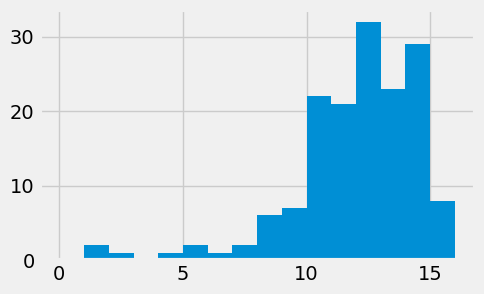

In [16]:
'''
1.3.1 Tracciate un'istogramma dell'età dei cani, fissando a un anno l'ampiezza delle classi e 
considerando gli intervalli chiusi a sinistra e aperti a destra.
'''
età = cani['EtaAnni']
bins = np.arange(0,età.max(),1)
età.hist(bins = np.hstack(bins))
plt.show()

In [17]:
#1.3.3 Quanti cani hanno età compresa tra 12 (inclusa) e 13 anni (esclusa) ?
len(cani[(cani['EtaAnni'] >= 12) & (cani['EtaAnni'] <13)])

32

In [18]:
#1.3.4 Quanti hanni ha il cane più anziano ?
cani.EtaAnni.max()

16.84

In [19]:
#1.3.5 Qual'è l'età maggiormente rappresentata ?
cani.EtaAnni.mode()

0    14.25
1    14.73
Name: EtaAnni, dtype: float64

In [20]:
#1.4 Consideriamo le variabili MORTE e MC

In [21]:
#1.4.1 Quanti cani sono deceduti ?
len(cani[cani['MC'] == 1])

87

In [25]:
'''
1.4.2 Nell'inserire le info riguardo un cane deceduto, l'ispettore ha sempre specificato se la
morte è avvenuta per cause cardiache o altre cause. Se no, in quanti casi l'operatore ha omesso
tale info ?
'''
print('No, non sempre tale info è stata inserita.')
len(cani['MC']) - len(cani['MC'].dropna())

No, non sempre tale info è stata inserita.


46

In [29]:
#1.4.3 Controllare che non vi siano casi di cane ancora vivo ma segnato come morto cardiaco.
len(cani[(cani['MORTE'] == 0) & cani['MC'] == 1])

0

In [30]:
#1.4.4 Quanti cani sono morti per cause cardiache ?
len(cani[(cani['MORTE'] == 1) & cani['MC'] == 1])

87

In [31]:
#1.4.5 Tra le morti, che percentuale è stata per cause cardiache ?
(len(cani[(cani['MORTE'] == 1) & cani['MC'] == 1]) / len(cani[cani['MORTE'] == 1]))*100

73.72881355932203

In [32]:
#1.5 Consideriamo ora GravitaIP

In [34]:
#1.5.2 Quali valori può assumere ?
cani.GravitaIP.unique()

array([0, 1, 2, 3], dtype=int64)

In [35]:
#1.5.3 Tabella frequenze relative di GravitaIP
gravita_rel = pd.crosstab(index=cani.GravitaIP, columns = 'Frequenze relative', colnames = [''], normalize = 'all')
gravita_rel

,Frequenze relative
GravitaIP,
0,0.639752
1,0.180124
2,0.111801
3,0.068323


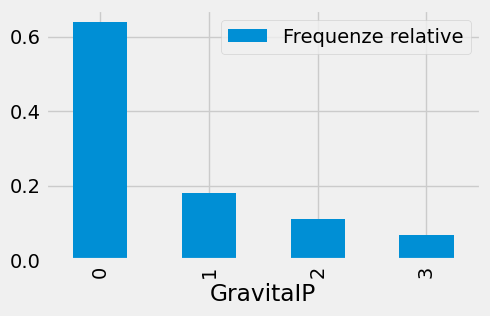

In [38]:
#1.5.4 Grafico opportuno che descriva la gravità dell'ipertensione
gravita_rel.plot.bar()
plt.show()

In [39]:
#1.6 Consideriamo ora il carattere SURVIVALTIME

In [42]:
#1.6.1 Quale percentuale di cani ancora vivi è in cura presso l'ambulatorio da meno di un anno ?
len(cani[(cani['MORTE'] == 0)&(cani['SURVIVALTIME'] < 365)])/len(cani[cani['MORTE'] == 0])

0.6511627906976745

In [43]:
#1.6.1 Quale percentuale di cani deceduti è sopravvissuta più di 3 anni ?
len(cani[(cani['MORTE'] == 1)&(cani['SURVIVALTIME'] > 1095)])/len(cani[cani['MORTE'] == 1])

0.1016949152542373